In [9]:
!sudo rm -r /tmp/*

rm: cannot remove '/tmp/HVVH0kRpEp': No such file or directory
rm: cannot remove '/tmp/KvV_yT7D6x': No such file or directory
rm: cannot remove '/tmp/qzcZqXrrYG': No such file or directory
rm: cannot remove '/tmp/wpD7bNR1sx': No such file or directory


In [10]:
q_step=32  
predictor=2  
valores_q_step = [8,16,20,55,60] 
tipos_cuantificacion = ["deadzone","midrise","midthreat"]
imagenes = 5

for q_step in valores_q_step:
    !mkdir /tmp/{q_step} && mkdir /tmp/{q_step}/original  &&  cp sequences/stockholm/* /tmp/{q_step}/original/
    #!mkdir /tmp/{q_step} && mkdir /tmp/{q_step}/original  &&  cp sequences/galeon/procesado/* /tmp/{q_step}/original/
    !mkdir /tmp/{q_step}/mcdwt  && cp /tmp/{q_step}/original/* /tmp/{q_step}/mcdwt/  
    !cd src/ && python3 -O MDWT.py -p /tmp/{q_step}/mcdwt/
    !ls /tmp/{q_step}
    !cd src/ && python3 -O MCDWT.py -P {predictor} -p /tmp/{q_step}/mcdwt/ 
    for tipo in tipos_cuantificacion:
        !mkdir /tmp/{q_step}/{tipo}
        for imagen in range(0,imagenes): 
            ii ="{:03d}".format(imagen)
            !python3 tools/quantize.py -t {tipo} -i /tmp/{q_step}/mcdwt/LH{ii}.png -o /tmp/{q_step}/{tipo}/LH{ii}.png -q {q_step}  
            !python3 tools/quantize.py -t {tipo} -i /tmp/{q_step}/mcdwt/HL{ii}.png -o /tmp/{q_step}/{tipo}/HL{ii}.png -q {q_step}   
            !python3 tools/quantize.py -t {tipo} -i /tmp/{q_step}/mcdwt/HH{ii}.png -o /tmp/{q_step}/{tipo}/HH{ii}.png -q {q_step} 
            !python3 tools/quantize.py -t {tipo} -i /tmp/{q_step}/mcdwt/LL{ii}.png -o /tmp/{q_step}/{tipo}/LL{ii}.png -q {q_step} 
        !mkdir /tmp/{q_step}/{tipo}/inversas  &&  cp /tmp/{q_step}/{tipo}/* /tmp/{q_step}/{tipo}/inversas  
        !cd src/ && python3 -O MCDWT.py -P {predictor} -p /tmp/{q_step}/{tipo}/inversas/ -b  
        !cd src/ && python3 -O MDWT.py -p /tmp/{q_step}/{tipo}/inversas/ -b  

mcdwt  original
cp: -r not specified; omitting directory '/tmp/8/deadzone/inversas'
cp: -r not specified; omitting directory '/tmp/8/midrise/inversas'
cp: -r not specified; omitting directory '/tmp/8/midthreat/inversas'
mcdwt  original
cp: -r not specified; omitting directory '/tmp/16/deadzone/inversas'
cp: -r not specified; omitting directory '/tmp/16/midrise/inversas'
cp: -r not specified; omitting directory '/tmp/16/midthreat/inversas'
mcdwt  original
cp: -r not specified; omitting directory '/tmp/20/deadzone/inversas'
cp: -r not specified; omitting directory '/tmp/20/midrise/inversas'
cp: -r not specified; omitting directory '/tmp/20/midthreat/inversas'
mcdwt  original
cp: -r not specified; omitting directory '/tmp/55/deadzone/inversas'
cp: -r not specified; omitting directory '/tmp/55/midrise/inversas'
cp: -r not specified; omitting directory '/tmp/55/midthreat/inversas'
mcdwt  original
cp: -r not specified; omitting directory '/tmp/60/deadzone/inversas'
cp: -r not specified; omit

In [11]:
from suma import Sumando
try:
    import matplotlib.pyplot as plt
except:
    os.system("pip3 install matplotlib --user")
    import matplotlib.pyplot as plt

imagenes = 5
valores_q_step = [8,16,20,55,60] 
tipos_cuantificacion = ["deadzone","midrise","midthreat"]
resultado_total = {"deadzone" : [] ,"midrise" : [],"midthreat":[]}
s = Sumando()
for q_step in valores_q_step: 
    diccionario = {}
    for tipo in tipos_cuantificacion:        
        pesos = s.GetPesos(str(tipo),q_step)
        MSE_almacenado = 0.0
        for imagen in range(0,imagenes):
            MSE_almacenado+= s.GetMSE(tipo,imagen,q_step)
        resultado_total[tipo].append([pesos,MSE_almacenado/imagenes]) 

mostrar_graficas = [resultado_total]
#print(resultado_total)
#plt.figure()
#diccionario = resultado_total
#for tipo in diccionario:
#    plot = plt.plot([i[0] for i in diccionario[tipo]],[i[1] for i in diccionario[tipo]],label=tipo)
#    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper', borderaxespad=0.)
#plt.ylabel('Error')
#plt.xlabel('Peso')
#plt.title(tipo)
#plt.show()'''

In [12]:
!sudo rm -r /tmp/*

In [13]:
q_step=32  
predictor=2  
valores_q_step = [8,16,20,55,60] 
tipos_cuantificacion = ["deadzone","midrise","midthreat"]
imagenes = 5

for q_step in valores_q_step:
    #!mkdir /tmp/{q_step} && mkdir /tmp/{q_step}/original  &&  cp sequences/stockholm/* /tmp/{q_step}/original/
    !mkdir /tmp/{q_step} && mkdir /tmp/{q_step}/original  &&  cp sequences/galeon/procesado/* /tmp/{q_step}/original/
    !mkdir /tmp/{q_step}/mcdwt  && cp /tmp/{q_step}/original/* /tmp/{q_step}/mcdwt/  
    !cd src/ && python3 -O MDWT.py -p /tmp/{q_step}/mcdwt/
    !ls /tmp/{q_step}
    !cd src/ && python3 -O MCDWT.py -P {predictor} -p /tmp/{q_step}/mcdwt/ 
    for tipo in tipos_cuantificacion:
        !mkdir /tmp/{q_step}/{tipo}
        for imagen in range(0,imagenes): 
            ii ="{:03d}".format(imagen)
            !python3 tools/quantize.py -t {tipo} -i /tmp/{q_step}/mcdwt/LH{ii}.png -o /tmp/{q_step}/{tipo}/LH{ii}.png -q {q_step}  
            !python3 tools/quantize.py -t {tipo} -i /tmp/{q_step}/mcdwt/HL{ii}.png -o /tmp/{q_step}/{tipo}/HL{ii}.png -q {q_step}   
            !python3 tools/quantize.py -t {tipo} -i /tmp/{q_step}/mcdwt/HH{ii}.png -o /tmp/{q_step}/{tipo}/HH{ii}.png -q {q_step} 
            !python3 tools/quantize.py -t {tipo} -i /tmp/{q_step}/mcdwt/LL{ii}.png -o /tmp/{q_step}/{tipo}/LL{ii}.png -q {q_step} 
        !mkdir /tmp/{q_step}/{tipo}/inversas  &&  cp /tmp/{q_step}/{tipo}/* /tmp/{q_step}/{tipo}/inversas  
        !cd src/ && python3 -O MCDWT.py -P {predictor} -p /tmp/{q_step}/{tipo}/inversas/ -b  
        !cd src/ && python3 -O MDWT.py -p /tmp/{q_step}/{tipo}/inversas/ -b  

mcdwt  original
cp: -r not specified; omitting directory '/tmp/8/deadzone/inversas'
cp: -r not specified; omitting directory '/tmp/8/midrise/inversas'
cp: -r not specified; omitting directory '/tmp/8/midthreat/inversas'
mcdwt  original
cp: -r not specified; omitting directory '/tmp/16/deadzone/inversas'
cp: -r not specified; omitting directory '/tmp/16/midrise/inversas'
cp: -r not specified; omitting directory '/tmp/16/midthreat/inversas'
mcdwt  original
cp: -r not specified; omitting directory '/tmp/20/deadzone/inversas'
cp: -r not specified; omitting directory '/tmp/20/midrise/inversas'
cp: -r not specified; omitting directory '/tmp/20/midthreat/inversas'
mcdwt  original
cp: -r not specified; omitting directory '/tmp/55/deadzone/inversas'
cp: -r not specified; omitting directory '/tmp/55/midrise/inversas'
cp: -r not specified; omitting directory '/tmp/55/midthreat/inversas'
mcdwt  original
cp: -r not specified; omitting directory '/tmp/60/deadzone/inversas'
cp: -r not specified; omit

In [14]:
from suma import Sumando
try:
    import matplotlib.pyplot as plt
except:
    os.system("pip3 install matplotlib --user")
    import matplotlib.pyplot as plt

imagenes = 5
valores_q_step = [8,16,20,55,60] 
tipos_cuantificacion = ["deadzone","midrise","midthreat"]
resultado_total = {"deadzone" : [] ,"midrise" : [],"midthreat":[]}
s = Sumando()
for q_step in valores_q_step: 
    diccionario = {}
    for tipo in tipos_cuantificacion:        
        pesos = s.GetPesos(str(tipo),q_step)
        MSE_almacenado = 0.0
        for imagen in range(0,imagenes):
            MSE_almacenado+= s.GetMSE(tipo,imagen,q_step)
        resultado_total[tipo].append([pesos,MSE_almacenado/imagenes]) 

mostrar_graficas.append(resultado_total)
print(mostrar_graficas)
plt.figure()
#diccionario = resultado_total


        




[{'deadzone': [[4614722.0, 18.08641438802083], [2448407.0, 42.71575249565972], [2198044.0, 57.317884860568576], [1297000.0, 248.51879265679253], [1213737.0, 278.4328746880425]], 'midrise': [[8817604.0, 16.13230489095052], [7634739.0, 76.02157891167535], [7470063.0, 126.0644200981988], [6667192.0, 1191.5396264648439], [6603836.0, 1437.6368425157336]], 'midthreat': [[6512902.0, 9.198691270616319], [3632905.0, 17.85880350748698], [2984517.0, 21.616653442382812], [1407553.0, 57.912724745008674], [1344266.0, 65.88114162868924]]}, {'deadzone': [[1959835.0, 1073625979.4357325], [1227226.0, 1073511933.4294163], [1152132.0, 1073460680.7245601], [645669.0, 1073009936.6941016], [597135.0, 1072943388.6567047]], 'midrise': [[3499399.0, 1073738900.3429476], [3096299.0, 1073733831.2277883], [3075019.0, 1073740016.687261], [2717592.0, 1073764419.0909557], [2665089.0, 1073778883.196781]], 'midthreat': [[2516642.0, 1073728818.5554641], [1609258.0, 1073732032.8170706], [1484105.0, 1073740633.3418319], [

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

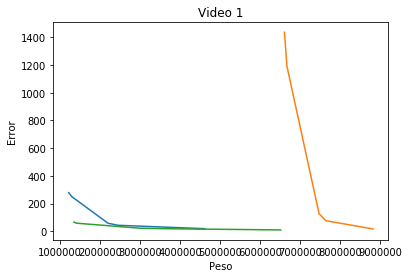

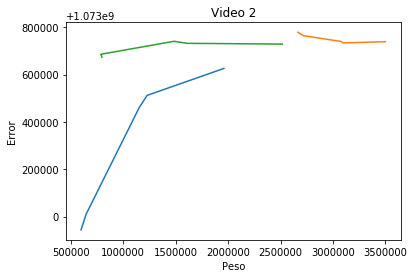

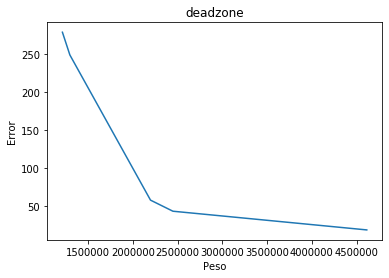

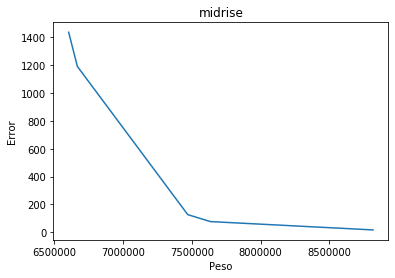

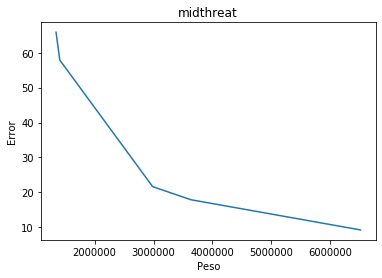

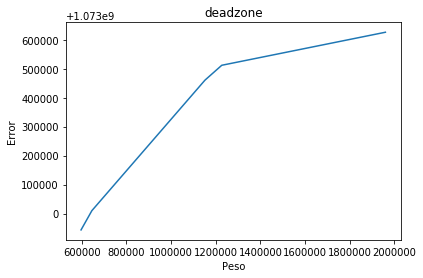

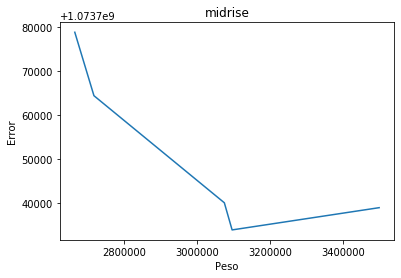

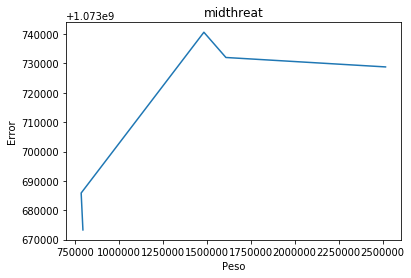

In [15]:
counter = 1
for diccionario in mostrar_graficas:
    
    for tipo in diccionario:
        plot = plt.plot([i[0] for i in diccionario[tipo]],[i[1] for i in diccionario[tipo]],label=tipo)
        #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper', borderaxespad=0.)
    plt.ylabel('Error')
    plt.xlabel('Peso')
    plt.title("Video " + str(counter))
    plt.show()
    counter += 1
    
    
counter = 1
for diccionario in mostrar_graficas:    
    for tipo in diccionario:
        plot = plt.plot([i[0] for i in diccionario[tipo]],[i[1] for i in diccionario[tipo]],label=tipo)
        #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper', borderaxespad=0.)
        plt.ylabel('Error')
        plt.xlabel('Peso')
        plt.title("Video "+ counter + " Cuantificador: "+tipo)
        plt.show()
    counter+=1
